In [1]:
import numpy as np
import pandas as pd

In [2]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [3]:
target = [0]*100 + [1]*100 + [2]*100

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fruits, target,test_size=0.2,random_state=0)

In [5]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [6]:
x_train_scaled_reshape = x_train_scaled.reshape(-1,100*100)
x_test_scaled_reshape = x_test_scaled.reshape(-1,100*100)

In [7]:
x_train_scaled_reshape.shape, len(y_train)

((240, 10000), 240)

In [8]:
from tensorflow import keras
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
dense = Dense(3,activation='softmax', input_shape=(10000,))

In [10]:
model = Sequential(dense)

In [11]:
model.compile(loss=sparse_categorical_crossentropy, metrics='accuracy')

In [12]:
y_train = np.array(y_train)

In [13]:
model.fit(x_train_scaled_reshape, y_train, epochs=5)

Epoch 1/5
8/8 [==============================] - 0s 3ms/step - loss: 2.4442 - accuracy: 0.4375
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.9125
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9958
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 1.0000


In [14]:
y_test = np.array(y_test)

In [15]:
model.evaluate(x_test_scaled_reshape, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 1.0000


[0.04345240443944931, 1.0]

In [16]:
predict_score = model.predict(x_test_scaled_reshape)

2/2 [==============================] - 0s 3ms/step


In [17]:
np.max(predict_score, axis=1)

array([0.96711606, 0.9163126 , 0.99772257, 0.9153091 , 0.874594  ,
       0.95469284, 0.9626732 , 0.96028084, 0.9902852 , 0.9534852 ,
       0.9709283 , 0.9891144 , 0.92309576, 0.99791783, 0.997232  ,
       0.9990258 , 0.98190695, 0.9975005 , 0.97434366, 0.9575509 ,
       0.9157796 , 0.92840594, 0.68457943, 0.96547556, 0.99572915,
       0.9398867 , 0.89856315, 0.9670116 , 0.9884312 , 0.95166737,
       0.99865425, 0.9989292 , 0.99842274, 0.95053893, 0.9766432 ,
       0.9458274 , 0.9444663 , 0.9336548 , 0.88420755, 0.9746663 ,
       0.99268097, 0.99485767, 0.9912442 , 0.99873847, 0.99549145,
       0.87582135, 0.9701314 , 0.99737144, 0.99580234, 0.9916338 ,
       0.9968051 , 0.99645764, 0.86488545, 0.95863396, 0.9987684 ,
       0.9535144 , 0.9673747 , 0.9936488 , 0.96807075, 0.9142007 ],
      dtype=float32)

In [18]:
fruits_reshape = fruits.reshape(-1,100*100)
fruits_reshape_scaled = fruits_reshape/255.0

In [19]:
total_score = model.predict(fruits_reshape_scaled)

10/10 [==============================] - 0s 2ms/step


In [20]:
np.argmax(total_score, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [21]:
np.array(target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
X = titanic[['Survived','Pclass','Sex','Age']]

In [24]:
# X['Sex'] = X['Sex'].map({'male':0, 'female':1})
tempIndex = X[X['Sex'] == 'male'].index
X.loc[tempIndex, 'Sex'] = 0

In [25]:
tempIndex = X[X['Sex'] == 'female'].index
X.loc[tempIndex, 'Sex'] = 1

In [26]:
X.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [27]:
X[X.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age
5,0,3,0,NaN
17,1,2,0,NaN
19,1,3,1,NaN
26,0,3,0,NaN
28,1,3,1,NaN
...,...,...,...,...
859,0,3,0,NaN
863,0,3,1,NaN
868,0,3,0,NaN
878,0,3,0,NaN


In [28]:
Y = X.iloc[:,0]
X = X.iloc[:,1:]

In [29]:
grouped = X.groupby(['Pclass', 'Sex'])
grouped['Age'].median()

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [30]:
X['Age'] = X['Age'].fillna(grouped['Age'].transform('median'))

In [31]:
X.shape

(891, 3)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [38]:
from tensorflow.keras.losses import binary_crossentropy
dense=Dense(1,activation='sigmoid', input_shape=(3,) )
model = Sequential(dense)
model.compile(loss=binary_crossentropy,metrics='accuracy')

In [39]:
x_train_scaled.shape, y_train.shape

((712, 3), (712,))

In [40]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
23/23 [==============================] - 0s 1ms/step - loss: 0.8953 - accuracy: 0.2163
Epoch 2/5
23/23 [==============================] - 0s 1ms/step - loss: 0.8790 - accuracy: 0.2205
Epoch 3/5
23/23 [==============================] - 0s 1ms/step - loss: 0.8652 - accuracy: 0.2233
Epoch 4/5
23/23 [==============================] - 0s 1ms/step - loss: 0.8515 - accuracy: 0.2317
Epoch 5/5
23/23 [==============================] - 0s 1ms/step - loss: 0.8384 - accuracy: 0.2388


In [41]:
model.evaluate(x_test_scaled, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.8352 - accuracy: 0.2291


[0.8352490663528442, 0.22905027866363525]

In [43]:
predicts = model.predict(x_test_scaled)

6/6 [==============================] - 0s 1ms/step


In [44]:
np.round(predicts)[:10], y_test[:10]

C:\Temp\ipykernel_32760\349406706.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.round(predicts)[:10], y_test[:10]


(array([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]], dtype=float32),
 495    0
 648    0
 278    0
 31     1
 255    1
 298    1
 609    1
 318    1
 484    1
 367    1
 Name: Survived, dtype: int64)

In [46]:
df = pd.read_csv(url)
df.nunique(dropna=False)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

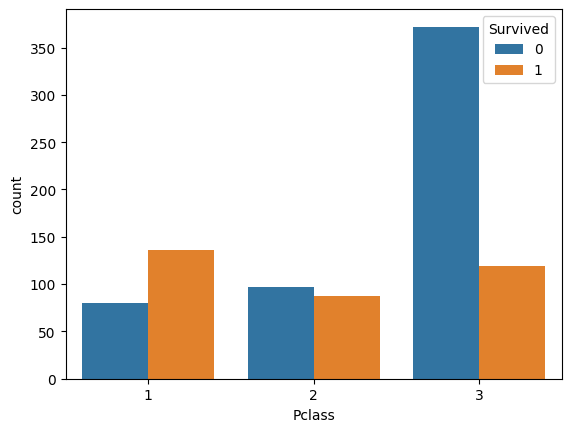

In [49]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

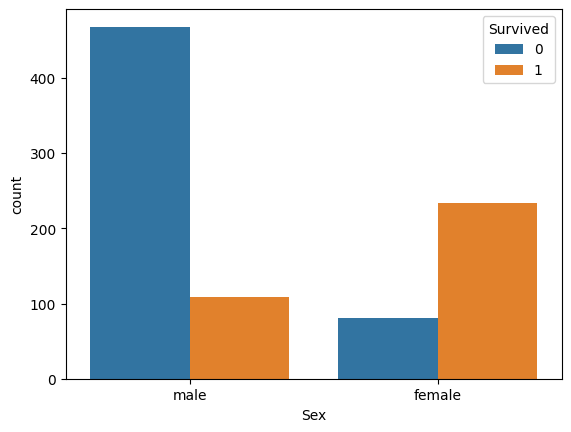

In [50]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.show()

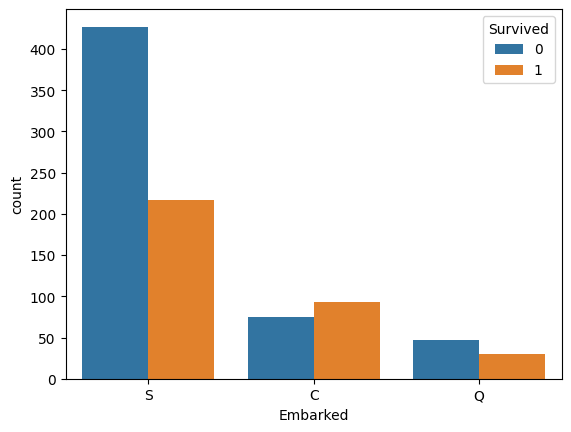

In [53]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.show()

In [55]:
df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
df['Embarked'].fillna('S', inplace=True)

In [58]:
X = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
Y = df['Survived']

In [59]:
X.shape, Y.shape

((891, 5), (891,))

In [60]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [61]:
data = pd.get_dummies(X)
data.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


In [65]:
x_train, x_test, y_train, y_test = train_test_split(data,Y,random_state=0)

In [66]:
dense = Dense(1,activation='sigmoid', input_shape=(8,))
model = Sequential(dense)
model.compile(loss=binary_crossentropy, metrics='accuracy')

In [72]:
result = model.fit(x_train, y_train, epochs=1000, verbose=0)

In [74]:
model.evaluate(x_train, y_train), model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.7937


([0.4615161418914795, 0.78742516040802],
 [0.44465887546539307, 0.7937219738960266])

0

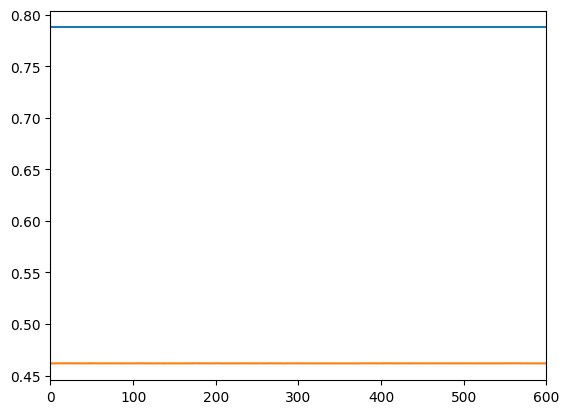

In [75]:
plt.plot(range(1000),result.history['accuracy'])
plt.plot(range(1000), result.history['loss'])
plt.xlim(0,600)
np.argmax(result.history['accuracy'])